In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import seaborn.apionly as sns

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Heart",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
    "permuted": "gray"
}

TFs = ['ZSCAN29', 'NFYB', 'IRF5', 'H4K20me1', 'H3K79me2', 'GABPA', 'ETV6', 'ESRRA', 'BHLHE40', 'TBP', 'BRCA1', 'CTCF', 'CBX5', 'NFXL1', 'IKZF2', 'EED', 'SKIL', 'H3K4me2', 'ZBED1', 'NR2C1', 'TBX21', 'POLR2A', 'RAD21', 'H3K4me1', 'MAZ', 'PKNOX1', 'POLR2AphosphoS2', 'ZNF592', 'MXI1', 'ASH2L', 'USF1', 'NRF1', 'E2F4', 'JUND', 'RAD51', 'BATF', 'IKZF1', 'SIN3A', 'MAX', 'CHD2', 'ZNF217', 'RCOR1', 'MYB', 'MYC', 'TCF12', 'TBL1XR1', 'ATF7', 'EP300', 'EGR1', 'MEF2C', 'MAFK', 'BCLAF1', 'CHD1', 'NFIC', 'HCFC1', 'H3K36me3', 'ZNF384', 'JUNB', 'RFX5', 'ELK1', 'SMAD5', 'ZBTB40', 'H3K27me3', 'MLLT1', 'CREM', 'BACH1', 'CUX1', 'SMC3', 'EBF1', 'CBFB', 'ARID3A', 'BMI1', 'H3K9ac', 'STAT3', 'SMARCA5', 'CHD7', 'ZNF24', 'SP1', 'HDGF', 'WRNIP1', 'FOXK2', 'NR2F1', 'TARDBP', 'NFYA', 'H3K4me3', 'RELB', 'ELF1', 'GATAD2B', 'ATF2', 'STAT1', 'TCF7', 'H3K27ac', 'DPF2', 'USF2', 'H2AFZ', 'SPI1', 'RB1', 'ZEB1', 'ZNF687', 'RUNX3', 'MTA2', 'TRIM22', 'TAF1', 'BCL11A', 'IRF3', 'ZNF143', 'NBN', 'ZNF207', 'MTA3', 'POLR2AphosphoS5', 'HSF1', 'KDM5A', 'YBX1']
Tissues =[]
eSTRs = []
eSTRsll =[]
causal = []
topstr = []
causalestr = []
sample = []
anova = []
shared = []
top_estr = []
perc_anova = []
merged_t = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/LR_SummaryTest_Table.tsv', sep='\t')

/usr/lib/python3.4/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
Ngenes=0; Ntests=0
To_screened=[]
for T in sorted(SHORTEN.keys()):
    #print(T)
    summary = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Master.table', sep='\t')
    #print(summary.shape, ' tests\t', len(set(list(summary['gene']))),' genes\t',summary.loc[summary['qvalue']<=0.1].shape[0],' eSTRs\t' ,T)
    coor = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Corr_Expr.csv')
    sample.append(coor.shape[0])
    
    Ngenes+=summary.shape[0]; Ntests+=len(set(list(summary['gene'])))
    print(summary.shape[0], T)
    summary['period'] = summary['motif'].apply(lambda x: len(x))
    #summary = summary.loc[summary['period']==1]
    esummary = summary.loc[summary['qvalue']<0.1]
    
    Tissues.append(' '.join(T.split('-')))
    eSTRs.append(esummary.shape[0])
    
    causal.append(summary.loc[summary['caviar.score']>=0.5].shape[0]) #***
    
    summary['top.variant'] = summary['top.variant'].astype(str)
    summary['top'] = summary['top.variant'].apply(lambda x: 1 if "STR" in x else 0)
    
    topstr.append(summary.loc[summary['top']==1].shape[0])
    top_estr.append(summary.loc[(summary['top']==1)&(summary['gene'].isin(list(esummary['gene'])))].shape[0])    
    causalestr.append(summary.loc[(summary['qvalue']<0.1) & (summary['top']==1)].shape[0])
    ANO = esummary.loc[(esummary['anova_qval']<=0.05)&(summary['delta_aic']>0)]
    To_screened.append(ANO.loc[ANO['caviar.score']>=0.5])

    anova.append(ANO.shape[0])
    perc_anova.append(ANO.shape[0]*100/eSTRs[-1])
    shared.append(merged_t.loc[(merged_t['E.tissues']>1 )&( merged_t['eSTR.'+SHORTEN[T]]==1)].shape[0])
    
print('Averages: ',Ngenes/17,' tests performed on ',Ntests/17,' genes')    

281322 Adipose-Subcutaneous
281226 Adipose-Visceral
277045 Artery-Aorta
275594 Artery-Tibial
279200 Brain-Caudate
277450 Brain-Cerebellum
267911 Cells-Transformedfibroblasts
281862 Esophagus-Mucosa
280639 Esophagus-Muscularis
271272 Heart-LeftVentricle
286474 Lung
271696 Muscle-Skeletal
284927 Nerve-Tibial
285854 Skin-NotSunExposed
285500 Skin-SunExposed
285472 Thyroid
261722 WholeBlood
Averages:  278539.17647058825  tests performed on  16063.941176470587  genes


In [3]:
print(len(Tissues), len(sample),len(top_estr),len(eSTRs), len(shared),len(anova), len(causal),len(topstr), len(perc_anova))
Table=pd.DataFrame({"Tissue":Tissues,"Sample size":sample, "top.estr":top_estr ,"Number eSTRs":eSTRs, '%anova_e':perc_anova,"share.eSTRs":shared,"Anova.eSTRs":anova,"Causal>0.5":causal, "STR.top.caviar":topstr} )
Table['id']= sorted(SHORTEN.keys())
Table['caviar.eSTRs']=causalestr
Table["perc_caviar"] = Table["caviar.eSTRs"]*100/Table["Number eSTRs"]

#Table['num.best.caviar'] = Table['id'].apply(lambda x: list(eSTR["best.tissue"]).count(x))
Table['col'] = Table['id'].apply(lambda x: COLORS[x])
Table['%e_Causal_0.5'] = Table["Causal>0.5"]*100/Table['caviar.eSTRs']
Table = Table[["Tissue", "Sample size","Number eSTRs","share.eSTRs","Anova.eSTRs","%anova_e","perc_caviar","caviar.eSTRs","Causal>0.5",'%e_Causal_0.5',"STR.top.caviar","id", "col"]].sort_values("Number eSTRs", ascending=False)
Table['%shared'] = Table["share.eSTRs"]*100/Table["Number eSTRs"]
print(sum(Table['%shared'])/17)
Table

17 17 17 17 17 17 17 17 17
64.2608900117479


,Tissue,Sample size,Number eSTRs,share.eSTRs,Anova.eSTRs,%anova_e,perc_caviar,caviar.eSTRs,Causal>0.5,%e_Causal_0.5,STR.top.caviar,id,col,%shared
12,Nerve Tibial,265,4365,2746,1581,36.219931,12.164948,531,43,8.097928,9662,Nerve-Tibial,gold,62.909507
15,Thyroid,262,4115,2461,1469,35.698663,13.025516,536,40,7.462687,9791,Thyroid,green,59.805589
14,Skin SunExposed,297,3842,2446,1142,29.724102,12.675690,487,41,8.418891,8753,Skin-SunExposed,cornflowerblue,63.664758
0,Adipose Subcutaneous,270,3600,2459,1097,30.472222,12.694444,457,46,10.065646,8249,Adipose-Subcutaneous,darkorange,68.305556
7,Esophagus Mucosa,255,3469,2061,1017,29.316806,13.317959,462,35,7.575758,8218,Esophagus-Mucosa,sienna,59.411934
3,Artery Tibial,276,3468,2318,1054,30.392157,13.177624,457,45,9.846827,8151,Artery-Tibial,red,66.839677
11,Muscle Skeletal,343,3375,1940,1066,31.585185,13.274074,448,36,8.035714,8173,Muscle-Skeletal,mediumslateblue,57.481481
6,Cells Transformedfibroblasts,225,3098,1828,914,29.502905,12.685604,393,26,6.615776,7044,Cells-Transformedfibroblasts,skyblue,59.005810
10,Lung,259,2993,2020,814,27.196793,14.066154,421,25,5.938242,7682,Lung,greenyellow,67.490812
8,Esophagus Muscularis,214,2832,1978,845,29.837571,14.971751,424,36,8.490566,7475,Esophagus-Muscularis,burlywood,69.844633


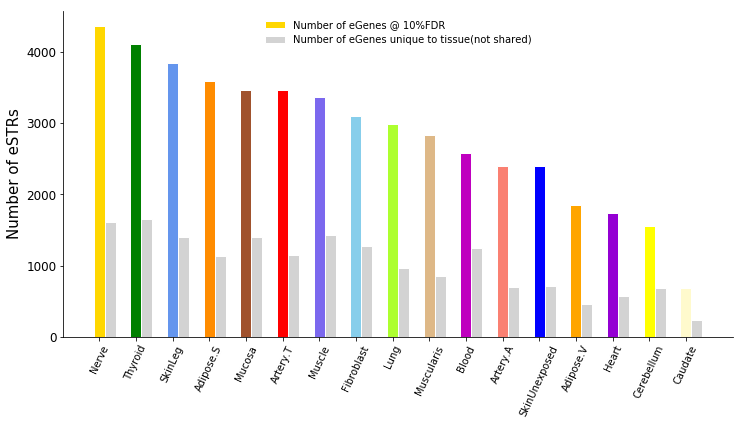

In [4]:
xvals = np.array(range(len(Tissues)))
w=0.3
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
bars1 = ax.bar(xvals, Table["Number eSTRs"], color=list(Table['col']), edgecolor="white", width=w, label="Number of eGenes @ 10%FDR")
bars2 = ax.bar(xvals+w, Table["Number eSTRs"]-Table["share.eSTRs"], color="lightgray", edgecolor="white", width=w, label="Number of eGenes unique to tissue(not shared)")
ax.set_xticks(xvals)
ax.set_xticklabels([SHORTEN[x] for x in Table["id"]], size=10, rotation=65);
ax.set_ylabel("Number of eSTRs", size=15)
ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=12);
ax.legend(loc="upper center", frameon=False);
plt.show()

In [12]:
#Supplementary table2
# high causal eSTRs (>50% causal) and passing Anova by AIC and pval<0.05
Candidates = pd.concat(To_screened).sort_values(['gene'])
Candidates['ok']=Candidates['gene']+Candidates['str.id']
print(Candidates.shape, 'cases across 17 tissues. ', len(set(list(Candidates['ok']))) , ' unique eSTR-gene pairs'  )
Candidates [['gene','str.start', 'qvalue', 'motif','caviar.score','delta_aic', 'delta_bic','anova_qval','top.variant','gene.name']]

(443, 32) cases across 17 tissues.  328  unique eSTR-gene pairs


,gene,str.start,qvalue,motif,caviar.score,delta_aic,delta_bic,anova_qval,top.variant,gene.name
108601,ENSG00000002919.10,46230387,0.001842,AC,0.526846,9.292729,5.979523,0.005146,STR_46230387,SNX11
241530,ENSG00000006576.12,77557804,0.001000,A,0.948084,23.211236,19.697807,0.001990,STR_77557804,PHTF2
278,ENSG00000008128.18,1694199,0.000958,AATG,0.815328,14.912756,11.403368,0.002066,STR_1694199,CDK11A
128401,ENSG00000008441.12,13099084,0.006260,AC,0.724321,15.948057,12.866652,0.005712,STR_13099084,NFIX
88096,ENSG00000021776.6,35208644,0.000814,A,0.515744,4.138603,0.585643,0.021877,STR_35208644,AQR
27931,ENSG00000023839.6,101623166,0.007285,AC,0.820061,11.047790,8.559154,0.021862,STR_101623166,ABCC2
221349,ENSG00000024862.12,139096074,0.001019,AAAAC,0.958086,12.230148,8.419007,0.002018,STR_139096074,CCDC28A
56016,ENSG00000025423.7,57172872,0.001343,A,0.918460,9.031182,5.693644,0.004735,STR_57172872,HSD17B6
130755,ENSG00000028277.16,42757920,0.002291,AACCCC,0.543028,6.837501,3.296238,0.010383,STR_42757920,POU2F2
87514,ENSG00000028528.10,64440177,0.001099,A,0.975012,13.745589,10.370310,0.002336,STR_64440177,SNX1


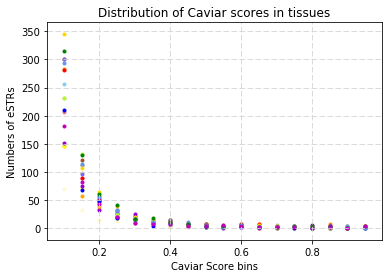

In [5]:
##Caviar distribution

for T in sorted(SHORTEN.keys()):
    #print(T)
    summary = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Master.table', sep='\t')
    summary = summary.loc[summary['significant']==1].copy()
    L = list(summary['caviar.score'].astype(float))
    bin_values = np.arange(start=min(L), stop=max(L), step=0.05)
    count=[]
    for i in range(len(bin_values)-1):
        count.append(len([x for x in L if x>=bin_values[i] and x<bin_values[i+1]]))
    #summary["caviar.score"].plot(kind='hist', bins=50, figsize=[8,4], alpha=.3, legend=True, color='blue')
    plt.scatter(bin_values[2:], count[1:], color=COLORS[T],label=T, marker='.')
    #plt.xticks(bin_values, rotation=60)
    plt.grid(color='lightgrey', linestyle='--')
    #print(T, summary.loc[summary['gene']=='ENSG00000162714.8']['caviar.score'].values, summary.loc[summary['gene']=='ENSG00000162714.8']['anova_pval'].values)

plt.title("Distribution of Caviar scores in tissues")
plt.xlabel("Caviar Score bins")
plt.ylabel("Numbers of eSTRs")
plt.show()

In [21]:
#Strong caviars and Anova combined
SC = pd.read_csv("/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Best_causality.Table", sep='\t')
SC15 = pd.read_csv("/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Best_of15_causality.Table", sep='\t')
anovapval=[]
deltaaic=[]

(111, 10) (96, 10)


,gene,chrom,best.str.start,best.score,best.q,best.tissue,NumTissues,gene.name,top.variant,best.llq
11532,ENSG00000101361.10,chr20,2633379.0,0.997788,0.002178,Muscle-Skeletal,17,NOP56,STR_2633379,0.001068


In [39]:
#For a given gene, print its caviar score in all tissues
gene_interest = 'ENSG00000162714.8'#'ENSG00000156171.10'

print("Caviar score\t\t","Tissue\t\t eSTR id\n")
for T in sorted(SHORTEN.keys()):
    #print(T)
    summary = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Master.table', sep='\t')
    summary = summary.loc[summary['significant']==1].copy()
    print('  ',summary.loc[summary['gene']==gene_interest]['caviar.score'].values, "\t\t",T,summary.loc[summary['gene']==gene_interest]['str.id'].values)
   

Tissue		 Caviar score		 eSTR id

Adipose-Subcutaneous     [0.00012362] 		 ['STR_247456912']
Adipose-Visceral     [0.00061496] 		 ['STR_247456912']
Artery-Aorta     [0.00084307] 		 ['STR_247456912']
Artery-Tibial     [0.00064765] 		 ['STR_247456912']
Brain-Caudate     [] 		 []
Brain-Cerebellum     [0.00282186] 		 ['STR_247456912']
Cells-Transformedfibroblasts     [0.00040307] 		 ['STR_247456912']
Esophagus-Mucosa     [] 		 []
Esophagus-Muscularis     [0.00310558] 		 ['STR_247456912']
Heart-LeftVentricle     [] 		 []
Lung     [2.60905e-11] 		 ['STR_247456912']
Muscle-Skeletal     [] 		 []
Nerve-Tibial     [1.36489e-11] 		 ['STR_247456912']
Skin-NotSunExposed     [] 		 []
Skin-SunExposed     [0.00226328] 		 ['STR_247456912']
Thyroid     [2.23133e-07] 		 ['STR_247456912']
WholeBlood     [] 		 []


In [19]:
sum(sorted(list(Table['%anova_e'])[:15]))/15  #with brain = 26.649672502144924

28.413668217086073

In [2]:
T="Artery-Aorta"
summary = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Master.table', sep='\t')
summary.loc[summary['gene.name']=='CSTB']
#merged_t.loc[merged_t['gene']=="ENSG00000138798.7"]

,gene,chrom,str.start,str.id,best.str,best.str.start,top.variant,caviar.score,beta,beta.se,...,top.str.rank,delta_bic,delta_aic,anova_pval,estr_fdr,esnp_fdr,llsignificant,significant,gene.name,str.end
63713,ENSG00000160213.5,chr21,45095725,STR_45095725,0,45196326.0,STR_45196326,0.000117,-0.009833,0.076246,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45095779
63714,ENSG00000160213.5,chr21,45100285,STR_45100285,0,45196326.0,STR_45196326,0.000377,-0.130095,0.075166,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45100295
63715,ENSG00000160213.5,chr21,45101143,STR_45101143,0,45196326.0,STR_45196326,0.000356,-0.130644,0.077418,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45101182
63716,ENSG00000160213.5,chr21,45115051,STR_45115051,0,45196326.0,STR_45196326,0.000228,0.098189,0.075014,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45115067
63717,ENSG00000160213.5,chr21,45149984,STR_45149984,0,45196326.0,STR_45196326,0.000122,-0.024683,0.072717,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45150012
63718,ENSG00000160213.5,chr21,45170615,STR_45170615,0,45196326.0,STR_45196326,0.000123,-0.030636,0.081073,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45170691
63719,ENSG00000160213.5,chr21,45170834,STR_45170834,0,45196326.0,STR_45196326,0.000153,-0.062417,0.074598,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45170861
63720,ENSG00000160213.5,chr21,45171983,STR_45171983,0,45196326.0,STR_45196326,0.001076,-0.172924,0.072610,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45172008
63721,ENSG00000160213.5,chr21,45192040,STR_45192040,0,45196326.0,STR_45196326,0.000235,0.097964,0.073168,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,CSTB,45192067
63722,ENSG00000160213.5,chr21,45196326,STR_45196326,1,45196326.0,STR_45196326,0.142910,0.298119,0.069989,...,2.0,7.014988,10.25143,0.000525,0.003193,0.481482,1,1,CSTB,45196360


In [3]:
cstb = merged_t.loc[merged_t['gene']=='ENSG00000160213.5']# gene.name  EGFLAM

#merged_t.loc[merged_t['E.tissues']>10]
cstb

,chrom,str.start,str.id,gene,E.tissues,ll.E.tissues,eSTR.Adipose.S,eSTR.Adipose.S.ll,qval.Adipose.S,llqval.Adipose.S,...,llqval.Thyroid,beta.Thyroid,eSTR.Blood,eSTR.Blood.ll,qval.Blood,llqval.Blood,beta.Blood,str.end,period,motif
71198,chr21,45095725,STR_45095725,ENSG00000160213.5,0.0,0.0,0.0,0.0,0.000000,0.622080,...,0.801310,-0.023106,0.0,0.0,NaN,0.793230,0.032881,45095779,5,AAAAT
71202,chr21,45100285,STR_45100285,ENSG00000160213.5,0.0,0.0,0.0,0.0,0.000000,0.701648,...,0.710612,0.052703,0.0,0.0,NaN,0.840498,-0.011990,45100295,1,A
71206,chr21,45101143,STR_45101143,ENSG00000160213.5,0.0,0.0,0.0,0.0,0.000000,0.528995,...,0.836084,-0.007505,0.0,0.0,NaN,0.756676,-0.046830,45101182,4,AGAT
71210,chr21,45115051,STR_45115051,ENSG00000160213.5,0.0,0.0,0.0,0.0,0.000000,0.814012,...,0.316006,-0.126197,0.0,0.0,NaN,0.770189,0.040454,45115067,1,A
71215,chr21,45149984,STR_45149984,ENSG00000160213.5,0.0,0.0,0.0,0.0,0.000000,0.529881,...,0.745716,-0.040975,0.0,0.0,NaN,0.825324,-0.018721,45150012,4,AATC
71220,chr21,45170615,STR_45170615,ENSG00000160213.5,0.0,3.0,0.0,0.0,0.000000,0.214060,...,0.023529,-0.220074,0.0,0.0,NaN,0.554911,-0.091857,45170691,2,AC
71225,chr21,45170834,STR_45170834,ENSG00000160213.5,0.0,2.0,0.0,0.0,0.000000,0.411138,...,0.604865,-0.074085,0.0,0.0,NaN,0.799366,-0.030185,45170861,2,AC
71230,chr21,45171983,STR_45171983,ENSG00000160213.5,0.0,1.0,0.0,0.0,0.000000,0.541912,...,0.836198,-0.006890,0.0,0.0,NaN,0.639034,-0.070522,45172008,2,AC
71234,chr21,45192040,STR_45192040,ENSG00000160213.5,0.0,5.0,0.0,0.0,0.000000,0.223864,...,0.005026,0.234843,0.0,1.0,NaN,0.078339,0.163757,45192067,2,AG
71239,chr21,45196326,STR_45196326,ENSG00000160213.5,13.0,13.0,1.0,1.0,0.030541,0.005843,...,0.000851,0.476648,1.0,1.0,0.002972,0.001579,0.395473,45196360,5,CCCCG
